In [1]:
import numpy as np

In [2]:
from elegantIO import elegantLatticeFile
from elegantIO import elegant_findtwiss

import matplotlib.pyplot as plt

In [3]:
css_lattice=elegantLatticeFile()

dipole_r = 2/np.pi
dipole_k1 = -0.9/dipole_r **2

css_lattice.addElement('dip', 'CSBEND', l=1.0, angle=np.pi/2., k1 = dipole_k1)

css_lattice.addElement('q1', 'kquad', l=0.2068, k1=6.62010)
css_lattice.addElement('q2', 'kquad', l=0.2068, k1=-14.7699)
css_lattice.addElement('q3', 'kquad', l=0.2068, k1=7.79589)

css_lattice.addElement('d1', 'edrift', l=0.3466)
css_lattice.addElement('d2', 'edrift', l=0.1282)
css_lattice.addElement('d3', 'edrift', l=0.1808+0.0075)

css_lattice.appendToBeamline('half', 'dip','d1','q1','d2','q2','d2','q3','d3','d3')
css_lattice.appendToBeamline('css', 'half', 'd3','d3','q3','d2','q2','d2','q1','d1','dip')
css_lattice.setUseLine()
css_lattice.useline

'CSS'

In [4]:
initial_optics = [4.383,0.306,0,0,4.383,0.306,0,0]
    
twiss_list, twiss_parameter=elegant_findtwiss(css_lattice,matched=0, initial_optics = initial_optics)

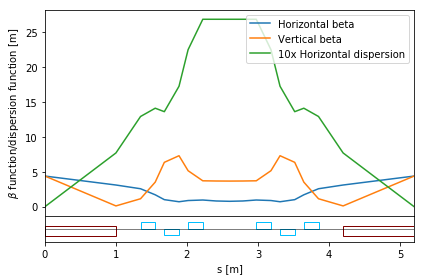

In [5]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
css_lattice.plotBeamline(ax2)

ax1.plot(twiss_list[0], twiss_list[1], label='Horizontal beta')
ax1.plot(twiss_list[0], twiss_list[6], label='Vertical beta')
ax1.plot(twiss_list[0], twiss_list[4]*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

NameError: name 'fodo_lattice' is not defined

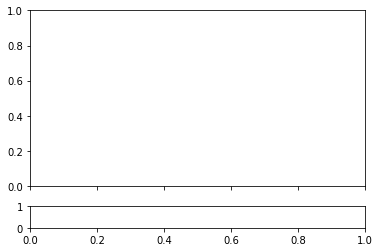

In [6]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
fodo_lattice.plotBeamline(ax2)

ax1.plot(twiss_list[0], twiss_list[3], label='Horizontal phase advance')
ax1.plot(twiss_list[0], twiss_list[8], label='Vertical phase advance')

ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'Phase advance')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

In [ ]:
fodo_lattice.addElement('w1','watch',filename='"%s_%03ld.w1"')
fodo_lattice.appendToBeamline('fodo', 'w1','qfh', 'w1','oo','w1','qdh','w1','qdh','w1','oo','qfh','w1')